##**Nama  : Rafa Fadil Aras**
##**NIM   : 2341720007**
##**Kelas : TI-3G**

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


**Jawaban**

Variabel yang memiliki missing value dan jumlahnya yaitu
- workclass = 963
- occupation = 966
- native-country = 274

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

#workclass
df['workclass'] = df['workclass'].fillna(value=df['workclass'].mode()[0])

#occupation
df['occupation'] = df['occupation'].fillna(value=df['occupation'].mode()[0])

#native-country
df['native-country'] = df['native-country'].fillna(value=df['native-country'].mode()[0])

df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

cat_cols = df.select_dtypes(include=['object']).columns
print(list(cat_cols))

for col in cat_cols:
    print(f"\nKolom: {col}")
    print(df[col].unique())

for col in ['workclass', 'occupation', 'native-country']:
  df[col] = df[col].replace('?', 'Others')
  print(df[col].unique())


['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

Kolom: workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Others' 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Kolom: education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kolom: marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kolom: occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Others'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

Kolom: relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Kolom: race
['White' 'Black' 'Asian-Pac-I

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

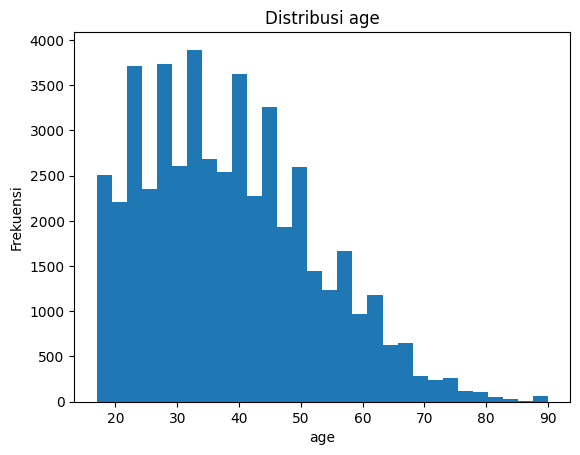

In [ ]:
# Jawab 1.1 - Histrogram

num_cols = ['age']
for col in num_cols:
  plt.figure()
  plt.hist(df[col], bins=30)
  plt.title(f'Distribusi {col}')
  plt.xlabel(col); plt.ylabel('Frekuensi')
  plt.show

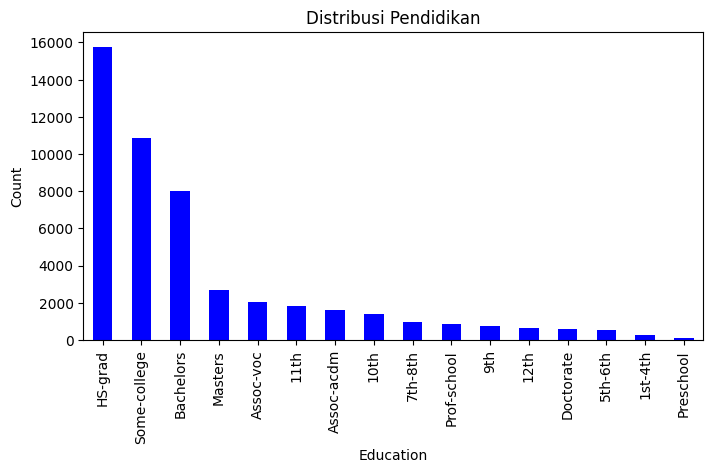

In [ ]:
# Jawab 1.2 - Barchart

plt.figure(figsize=(8,4))
df['education'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribusi Pendidikan')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


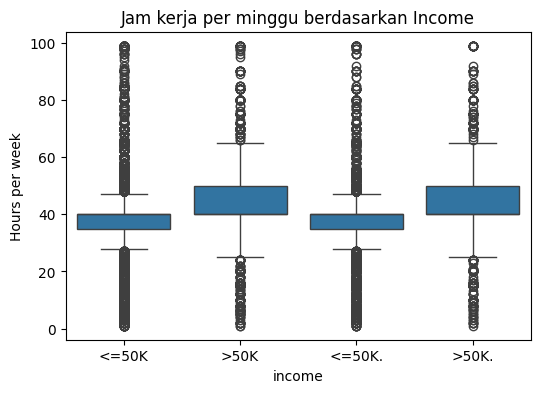

In [ ]:
# Jawab 1.3 - Boxplot

plt.figure(figsize=(6,4))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Jam kerja per minggu berdasarkan Income')
plt.xlabel('income')
plt.ylabel('Hours per week')
plt.show()

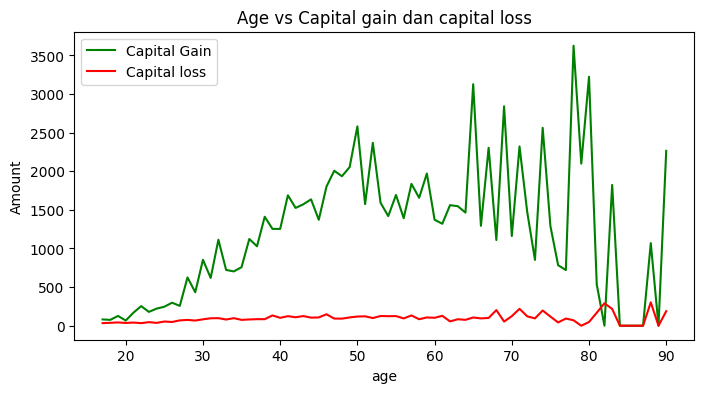

In [ ]:
# Jawab 1.4 - Lineplot

df_grouped = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(8,4))
plt.plot(df_grouped['age'], df_grouped['capital-gain'], label='Capital Gain', color='green')
plt.plot(df_grouped['age'], df_grouped['capital-loss'], label='Capital loss', color='red')
plt.title('Age vs Capital gain dan capital loss')
plt.xlabel('age')
plt.ylabel('Amount')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
  1. Fenomena yang terjadi pada distribusi data 'age' adalah mayoritas responden
  berada di usia produktif, dengan rentang 20-40 tahun dengan puncak sekitar usia 30-an.
  Jumlah usia lebih dari 40 tahun menurun, terutama setelah usia 60 yang relatif jarang muncul.
  2. Jika terdapat data hilang pada variabel 'age', maka strategi yang saya terapkan adalah
  dengan mengganti dengan nilai median, karena distribusi umur cenderung condong ke kanan
  sehingga median lebih representatif dibanding mean, dan lebih tahan terhadap pengaruh outlier.
  3.  jumlah outlier pada variabel hours-per-week di kategori <=50k jauh lebih banyak daripda dengan kategori >50k.
  hal ini terlihat dari sebaran titik di luar whisker boxplot yang lebih padat
  pda kelompok <=50k sehingga kategori <=50k memiliki outlier terbanyak dan kateogiri >50k tetap
  memiliki outlier tapi jumlahnya lebih sedikit.
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])

df['income'] = le.fit_transform(df['income'])
df[['sex', 'income']].head()

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

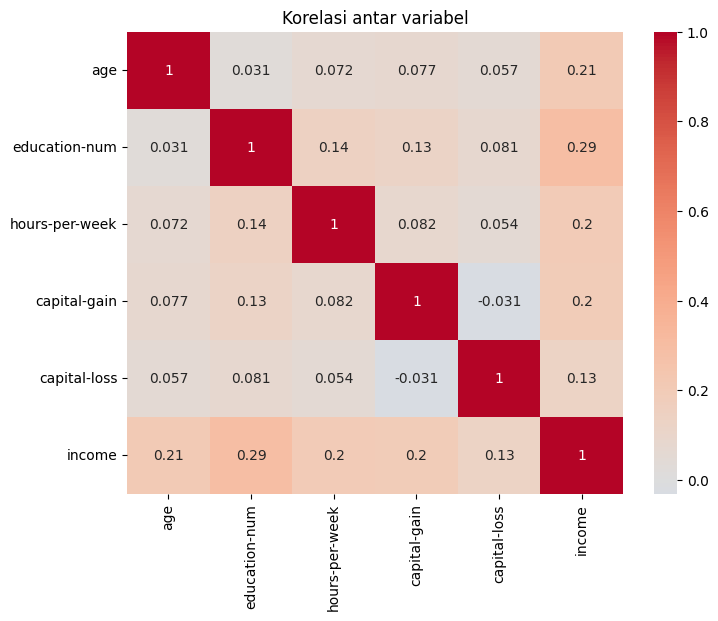

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import seaborn as sns
import matplotlib.pyplot as plt

cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antar variabel')
plt.show()

In [ ]:
# Hasil analisis jelaskan pada cell ini

'''
informasi yang didapatkan dari hasil korelasi diatas adalah variabel yang paling
berpengaruh terhadap income adalah education-num (0,29) yang berarti semakin tinggi
pendidikan semkain besar juga peluang berpendapatan lebih tinggi. Faktor lain seperti
age, hours-per-week dan capital-gain juga berpengaruh tapi lebih lemah, dan capital-loss
tidak berpengaruh.
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


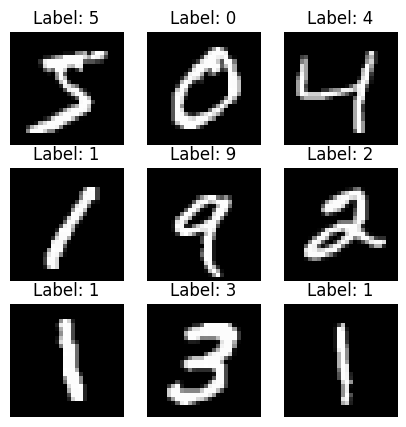

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape awal:  (10000, 28, 28)
Shape setelah upsampling:  (10000, 32, 32)


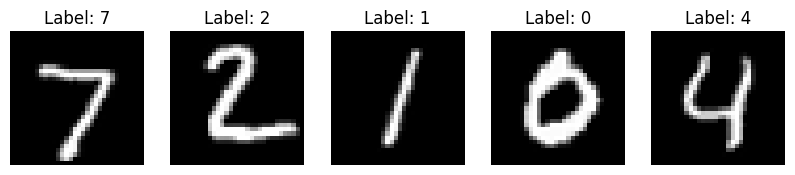

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

x_test_upsampling = np.zeros((X_test.shape[0], 32, 32))

for i in range(X_test.shape[0]):
  x_test_upsampling[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Shape awal: ", X_test.shape)
print("Shape setelah upsampling: ", x_test_upsampling.shape)

plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test_upsampling[i], cmap="gray")
  plt.title(f"Label: {y_test[i]}")
  plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai min:  0.0
Nilai max:  1.0


<function matplotlib.pyplot.show(close=None, block=None)>

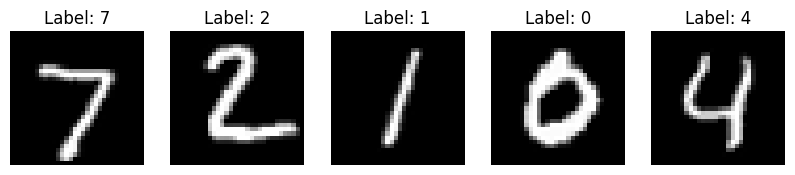

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

x_test_normalisasi = x_test_upsampling / 255.0

print("Nilai min: ", x_test_normalisasi.min())
print("Nilai max: ", x_test_normalisasi.max())

plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test_normalisasi[i], cmap="gray")
  plt.title(f"Label: {y_test[i]}")
  plt.axis("off")
plt.show

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

x_test_flatten = np.zeros((x_test_normalisasi.shape[0], 32*32))

for i in range(x_test_normalisasi.shape[0]):
  x_test_flatten[i] = x_test_normalisasi[i].flatten()

print("Shape sebelum flatten: ", x_test_normalisasi.shape)
print("Shape sesudah flatten: ", x_test_flatten.shape)

print("Contoh data 1 dimensi (1024 eelemen)")
print(x_test_flatten[0][:50])

Shape sebelum flatten:  (10000, 32, 32)
Shape sesudah flatten:  (10000, 1024)
Contoh data 1 dimensi (1024 eelemen)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
